Q1

In [1]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers ,random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np . dot (X , transformation )

# Add a bias term to the feature matrix
X = np . c_ [ np . ones (( X . shape [0] , 1) ) , X ]

# Initialize coefficients
W = np . zeros ( X . shape [1])

# Define the logistic sigmoid function
def sigmoid ( z ) :
    return 1 / (1 + np . exp ( - z ) )

# Define the logistic loss ( binary cross entropy ) function
def log_loss ( y_true , y_pred ) :
    epsilon = 1e-15 
    y_pred = np . clip ( y_pred , epsilon , 1 - epsilon ) # Clip to avoid log (0)
    return - ( y_true * np . log ( y_pred ) + (1 - y_true ) * np .log (1 - y_pred ) )

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history= []




 Iteration 0 : Loss = 0.6931 
 Iteration 1 : Loss = 0.6328 
 Iteration 2 : Loss = 0.5824 
 Iteration 3 : Loss = 0.5400 
 Iteration 4 : Loss = 0.5042 
 Iteration 5 : Loss = 0.4736 
 Iteration 6 : Loss = 0.4473 
 Iteration 7 : Loss = 0.4245 
 Iteration 8 : Loss = 0.4046 
 Iteration 9 : Loss = 0.3870 
W0 =  [0.00903176]
W1 =  [0.26230116]
W2 =  [0.49949384]


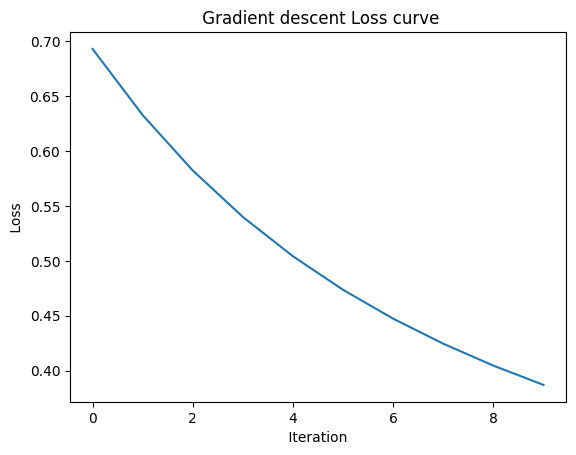

In [2]:
loss_history_G= []
oneMatrix = np.ones((X.shape[0],1))
y = y.reshape(-1, 1)
W = W.reshape(-1, 1)

for i in range(iterations):
    # Predict class probabilities and compute the loss
    y_pred = sigmoid ( np . dot ( X , W ))
    loss = log_loss ( y , y_pred )
    loss_history_G . append ( np . mean ( loss ))
    print (" Iteration %d : Loss = %.4f " % ( i , np . mean ( loss )))

    # Compute the gradient
    error = y_pred - y
    error = error.reshape(1,-1)
    gradient = (oneMatrix.T @ np.diag(error[0]) @ X ).T / y.shape[0]
    # Update the model parameters
    W -= learning_rate * gradient

# print weights
print("W0 = ",W[0])
print("W1 = ",W[1])
print("W2 = ",W[2])

# Plot the loss over the iterations
plt . plot ( loss_history_G )
plt . xlabel (' Iteration ')
plt . ylabel (' Loss ')
plt . title (' Gradient descent Loss curve')
plt . show ()

 Iteration 0 : Loss = 0.6931 
 Iteration 1 : Loss = 0.1933 
 Iteration 2 : Loss = 0.0911 
 Iteration 3 : Loss = 0.0494 
 Iteration 4 : Loss = 0.0307 
 Iteration 5 : Loss = 0.0220 
 Iteration 6 : Loss = 0.0181 
 Iteration 7 : Loss = 0.0166 
 Iteration 8 : Loss = 0.0163 
 Iteration 9 : Loss = 0.0163 
W0 =  [11.71643583]
W1 =  [10.20983751]
W2 =  [4.43019025]


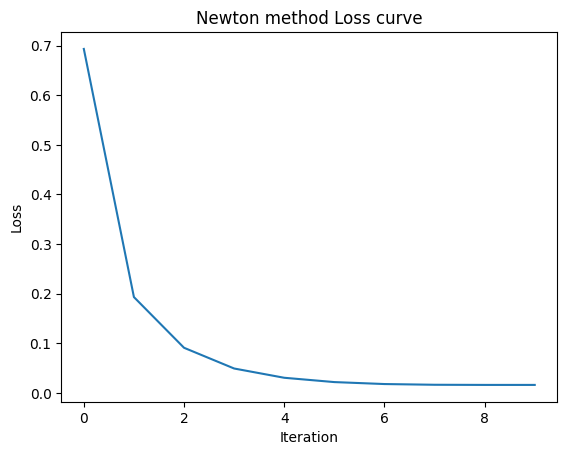

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Initialize W
W_N = np.zeros(X.shape[1])
loss_history_N = []
W_N = W_N.reshape(-1, 1)

for i in range(iterations):
    # Predict class probabilities and compute the loss
    y_pred_N = sigmoid(np.dot(X, W_N))
    loss_N = log_loss(y, y_pred_N)
    loss_history_N.append(np.mean(loss_N))
    print (" Iteration %d : Loss = %.4f " % ( i , np . mean ( loss_N )))

    # Compute the gradient
    error = y_pred_N - y
    error = error.reshape(1, -1)
    s = (y_pred_N - y) * (1 - y_pred_N - y)
    S = np.diag(s.reshape(-1))
    gradient = oneMatrix.T @ np.diag(error[0]) @ X
    gradient = gradient.T / y.shape[0]

    # Update the model parameters
    learning_rate = np.linalg.inv((1 / X.shape[0]) * (X.T @ S @ X))
    W_N -= learning_rate @ gradient

# Print weights
print("W0 = ", W_N[0])
print("W1 = ", W_N[1])
print("W2 = ", W_N[2])

# Plot the loss over the iterations
plt.plot(loss_history_N)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Newton method Loss curve')
plt.show()


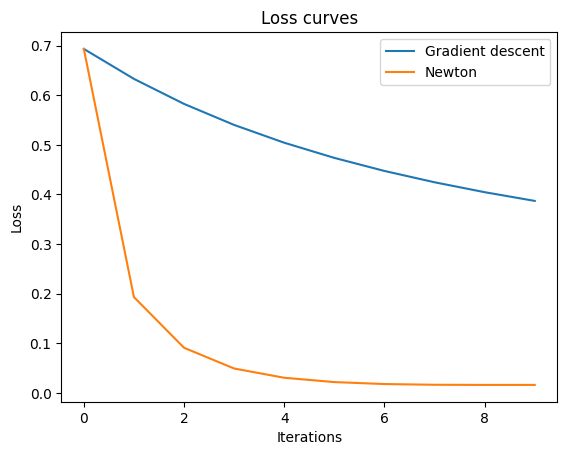

In [4]:
# Plot loss functions in a same graph
plt.plot(loss_history_G, label='Gradient descent')
plt.plot(loss_history_N, label='Newton')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curves')
plt.legend()
plt.show()

Q2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state
import ssl

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context


# Data loading
train_samples = 500
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)

logistic = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')
pipeline = Pipeline([('scaler', StandardScaler()),('lasso_logistic', logistic )])

param_grid = {'lasso_logistic__C': np.logspace(-2, 2, 9)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5) 
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Predict using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)

c:\Python311\cv\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Best hyperparameters: {'lasso_logistic__C': 0.31622776601683794}
Best accuracy: 0.8240000000000001
Test set accuracy: 0.85


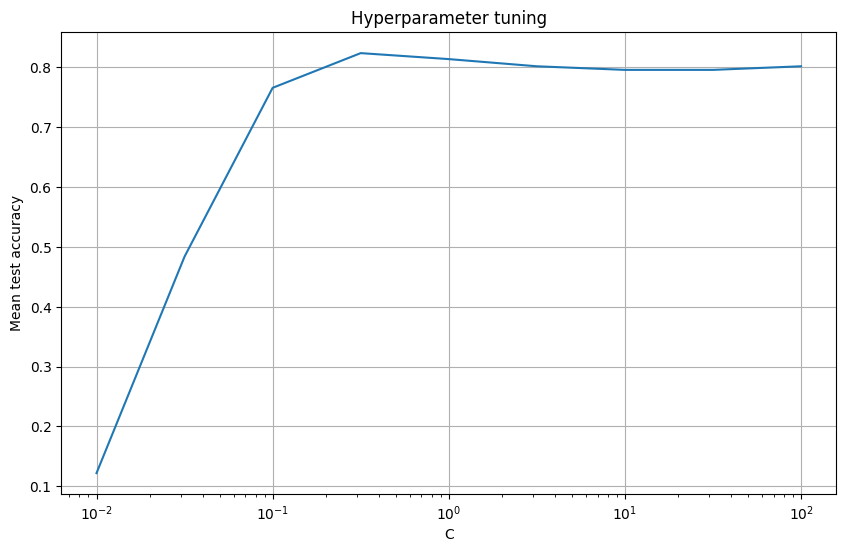

In [8]:
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['lasso_logistic__C'], grid_search.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Mean test accuracy')
plt.title('Hyperparameter tuning')
plt.grid()
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print confusion matrix, precision, recall, and F1-score
print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[ 6  0  0  0  0  1  0  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  0  0  0  2]
 [ 0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  1  0  0 11  0  2]
 [ 0  0  0  0  1  0  0  0 11  0]
 [ 0  1  0  1  0  1  0  1  0 11]]
Precision: 0.8594444444444445
Recall: 0.85
F1-Score: 0.8509356585443542


Q3

In [6]:
import math

# Logistic regression coefficients
w0 = -6
w1 = 0.05
w2 = 1

# Function to calculate the estimated probability
def calculate_probability(x1, x2):
    z = w0 + w1 * x1 + w2 * x2
    probability = 1 / (1 + math.exp(-z))
    return probability

# (a) Calculate the estimated probability for a student who studied for 40 hours and has GPA 3.5
hours_studied = 40
undergraduate_gpa = 3.5
probability_a = calculate_probability(hours_studied, undergraduate_gpa)
print(f"The estimated probability of receiving an A+ is approximately {probability_a:.4f}")

The estimated probability of receiving an A+ is approximately 0.3775


In [7]:
# (b) Calculate the number of hours needed for a 50% chance of receiving an A+
target_probability = 0.5

x1_guess = (math.log((1-target_probability)/target_probability) - w0 - w2 * undergraduate_gpa) / w1	# Rearrange the equation to solve for x1

print(f"To achieve a 50% chance of receiving an A+, a student needs to study for approximately {x1_guess:.2f} hours.")

To achieve a 50% chance of receiving an A+, a student needs to study for approximately 50.00 hours.
